# Single Layer Perceptron Model

Using the Single Layer Perceptron, we try to predict the Wine Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
shape=[df.shape[1]-1]

In [7]:
model=keras.Sequential([
    layers.Dense(units=1,input_shape=shape)    
])

In [8]:
X=df.drop(columns=["quality"])
y=df['quality']

In [9]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model.compile(loss='mae', optimizer='adam')


In [13]:
history=model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          batch_size=10
          )

Epoch 1/100
128/128 [==============================] - 1s 7ms/step - loss: 15.1122 - val_loss: 6.7449
Epoch 2/100
128/128 [==============================] - 0s 793us/step - loss: 5.3300 - val_loss: 3.6992
Epoch 3/100
128/128 [==============================] - 0s 806us/step - loss: 3.5566 - val_loss: 3.4263
Epoch 4/100
128/128 [==============================] - 0s 845us/step - loss: 3.1559 - val_loss: 3.1206
Epoch 5/100
128/128 [==============================] - 0s 774us/step - loss: 2.9051 - val_loss: 2.7989
Epoch 6/100
128/128 [==============================] - 0s 814us/step - loss: 2.4638 - val_loss: 2.4642
Epoch 7/100
128/128 [==============================] - 0s 727us/step - loss: 2.2573 - val_loss: 2.1218
Epoch 8/100
128/128 [==============================] - 0s 744us/step - loss: 1.9432 - val_loss: 1.7992
Epoch 9/100
128/128 [==============================] - 0s 786us/step - loss: 1.7148 - val_loss: 1.4503
Epoch 10/100
128/128 [==============================] - 0s 832us/step - lo

Epoch 80/100
128/128 [==============================] - 0s 722us/step - loss: 0.4829 - val_loss: 0.5362
Epoch 81/100
128/128 [==============================] - 0s 706us/step - loss: 0.5157 - val_loss: 0.5233
Epoch 82/100
128/128 [==============================] - 0s 735us/step - loss: 0.5008 - val_loss: 0.5205
Epoch 83/100
128/128 [==============================] - 0s 769us/step - loss: 0.5264 - val_loss: 0.5578
Epoch 84/100
128/128 [==============================] - 0s 771us/step - loss: 0.5075 - val_loss: 0.5179
Epoch 85/100
128/128 [==============================] - 0s 738us/step - loss: 0.4993 - val_loss: 0.5160
Epoch 86/100
128/128 [==============================] - 0s 730us/step - loss: 0.5009 - val_loss: 0.5151
Epoch 87/100
128/128 [==============================] - 0s 777us/step - loss: 0.5037 - val_loss: 0.5244
Epoch 88/100
128/128 [==============================] - 0s 743us/step - loss: 0.5116 - val_loss: 0.5335
Epoch 89/100
128/128 [==============================] - 0s 734us

In [14]:
predictions = model.predict(X_test)

In [15]:
history=pd.DataFrame(history.history)

<AxesSubplot:>

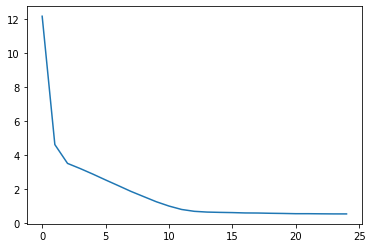

In [16]:
history[:25]['loss'].plot()

In [17]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [18]:
print(f"MAE:{mean_absolute_error(y_test,predictions)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,predictions))}")
print(f"R2:{r2_score(y_test,predictions)}")

MAE:0.5307736709713936
RMSE:0.6503278048894485
R2:0.3528347944472803


In [19]:
wine_stats=[[7.8,0.88,0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8]]

In [20]:
pred=model.predict(wine_stats)

In [21]:
pred

array([[5.303438]], dtype=float32)

In [22]:
w,b=model.weights

In [23]:
print(f"Weights:{w}\nBiases:{b}")

Weights:<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.03616715],
       [-0.48064008],
       [ 0.19846526],
       [ 0.01755887],
       [-0.6801303 ],
       [ 0.00659177],
       [-0.00121173],
       [ 0.7583458 ],
       [ 0.0230985 ],
       [ 0.7714924 ],
       [ 0.37737498]], dtype=float32)>
Biases:<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.32896513], dtype=float32)>


In [24]:
weights=[0.049,-0.932,-0.062,0.014,-0.469,0.004,-0.003,0.560,0.321,0.781,0.315]
bias=0.308
inputs=[7.8,0.88,0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8]

In [25]:
ans=0
for i in range(len(weights)):
    ans+=weights[i]*inputs[i]
ans+=bias

In [26]:
ans

4.962966